<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/dlmodels_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))


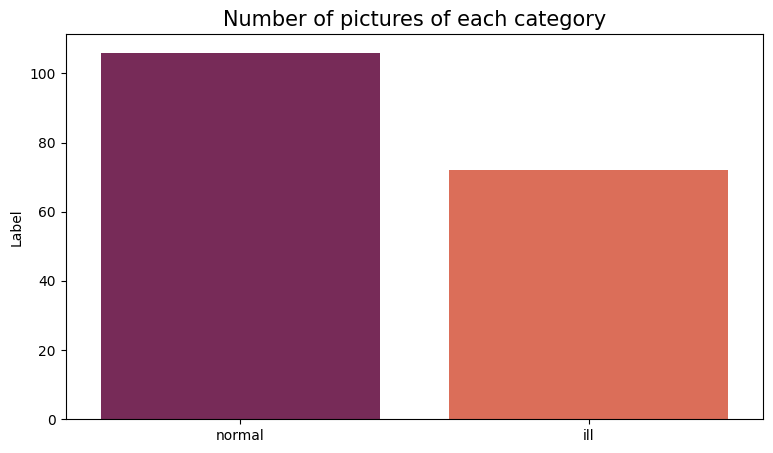

In [ ]:
# Define the image directory
image_dir = Path('/content/drive/MyDrive/newmodidata/Y2022Ankle')

# Get filepaths and labels
filepaths = list(image_dir.glob('**/*.jpg'))
labels = [os.path.split(os.path.split(x)[0])[1] for x in filepaths]

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset the index
image_df = image_df.sample(frac=1).reset_index(drop=True)

# Show the result
image_df.head(3)

# Display the number of pictures of each category
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x=vc.index, y=vc, palette="rocket")
plt.title("Number of pictures of each category", fontsize=15)
plt.show()

In [ ]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        rotation_range=30, # Uncomment to use data augmentation
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30, # Uncomment to use data augmentation
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)

In [ ]:
# Dictionary with the models
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet169": {"model":tf.keras.applications.DenseNet169, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "EfficientNetB2": {"model":tf.keras.applications.EfficientNetB2, "perf":0},
    "EfficientNetB3": {"model":tf.keras.applications.EfficientNetB3, "perf":0},
    "EfficientNetB4": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB5": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB6": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB7": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "InceptionResNetV2": {"model":tf.keras.applications.InceptionResNetV2, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNet": {"model":tf.keras.applications.MobileNet, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "MobileNetV3Small": {"model":tf.keras.applications.MobileNetV3Small, "perf":0},
    "NASNetMobile": {"model":tf.keras.applications.NASNetMobile, "perf":0},
    "ResNet101": {"model":tf.keras.applications.ResNet101, "perf":0},
    "ResNet101V2": {"model":tf.keras.applications.ResNet101V2, "perf":0},
    "ResNet152": {"model":tf.keras.applications.ResNet152, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

# Fit the models
for name, model in models.items():

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=1)

    # Sav the duration, the train_accuracy and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

Found 144 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 18 validated image filenames belonging to 2 classes.


5/5 [==============================] - 40s 7s/step - loss: 0.7776 - accuracy: 0.5486 - val_loss: 0.6723 - val_accuracy: 0.6875
DenseNet121          trained in 40.37 sec
5/5 [==============================] - 11s 1s/step - loss: 0.8606 - accuracy: 0.5000 - val_loss: 0.6367 - val_accuracy: 0.6875
MobileNetV2          trained in 10.7 sec
5/5 [==============================] - 45s 8s/step - loss: 0.7959 - accuracy: 0.5278 - val_loss: 0.5139 - val_accuracy: 0.8125
DenseNet169          trained in 45.03 sec
5/5 [==============================] - 55s 9s/step - loss: 0.7289 - accuracy: 0.6111 - val_loss: 0.5759 - val_accuracy: 0.8125
DenseNet201          trained in 93.22 sec
5/5 [==============================] - ETA: 0s - loss: 0.7123 - accuracy: 0.5417

5/5 [==============================] - 21s 3s/step - loss: 0.7123 - accuracy: 0.5417 - val_loss: 0.6981 - val_accuracy: 0.3125
EfficientNetB0       trained in 28.19 sec
5/5 [==============================] - ETA: 0s - loss: 0.7024 - accuracy: 0.5903

5/5 [==============================] - 29s 4s/step - loss: 0.7024 - accuracy: 0.5903 - val_loss: 0.7264 - val_accuracy: 0.3125
EfficientNetB1       trained in 30.15 sec
5/5 [==============================] - 30s 4s/step - loss: 0.7203 - accuracy: 0.4861 - val_loss: 0.6779 - val_accuracy: 0.6875
EfficientNetB2       trained in 30.78 sec
5/5 [==============================] - 39s 6s/step - loss: 0.7018 - accuracy: 0.5694 - val_loss: 0.6180 - val_accuracy: 0.6875
EfficientNetB3       trained in 38.7 sec
5/5 [==============================] - 50s 7s/step - loss: 0.7163 - accuracy: 0.5208 - val_loss: 0.6558 - val_accuracy: 0.6875
EfficientNetB4       trained in 55.68 sec
5/5 [==============================] - 50s 8s/step - loss: 0.6996 - accuracy: 0.6042 - val_loss: 0.7174 - val_accuracy: 0.3125
EfficientNetB5       trained in 49.93 sec
5/5 [==============================] - 50s 7s/step - loss: 0.7057 - accuracy: 0.5694 - val_loss: 0.6392 - val_accuracy: 0.6875
EfficientNetB6       trained 

In [ ]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name,
                          models[name]['train_accuracy'][-1],
                          models[name]['val_acc'][-1],
                          models[name]['perf']])

df_results = pd.DataFrame(models_result,
                          columns = ['model','train_accuracy','val_accuracy','Training time (sec)'])
df_results.sort_values(by='val_accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,train_accuracy,val_accuracy,Training time (sec)
0,DenseNet169,0.5278,0.8125,45.03
1,DenseNet201,0.6111,0.8125,93.22
2,ResNet101V2,0.6875,0.8125,88.33
3,ResNet50V2,0.6042,0.7500,28.73
4,NASNetMobile,0.6181,0.7500,37.04
5,DenseNet121,0.5486,0.6875,40.37
6,MobileNet,0.5694,0.6875,12.85
7,VGG19,0.5972,0.6875,143.10
8,ResNet50,0.5694,0.6875,44.59
9,ResNet152V2,0.5069,0.6875,85.08


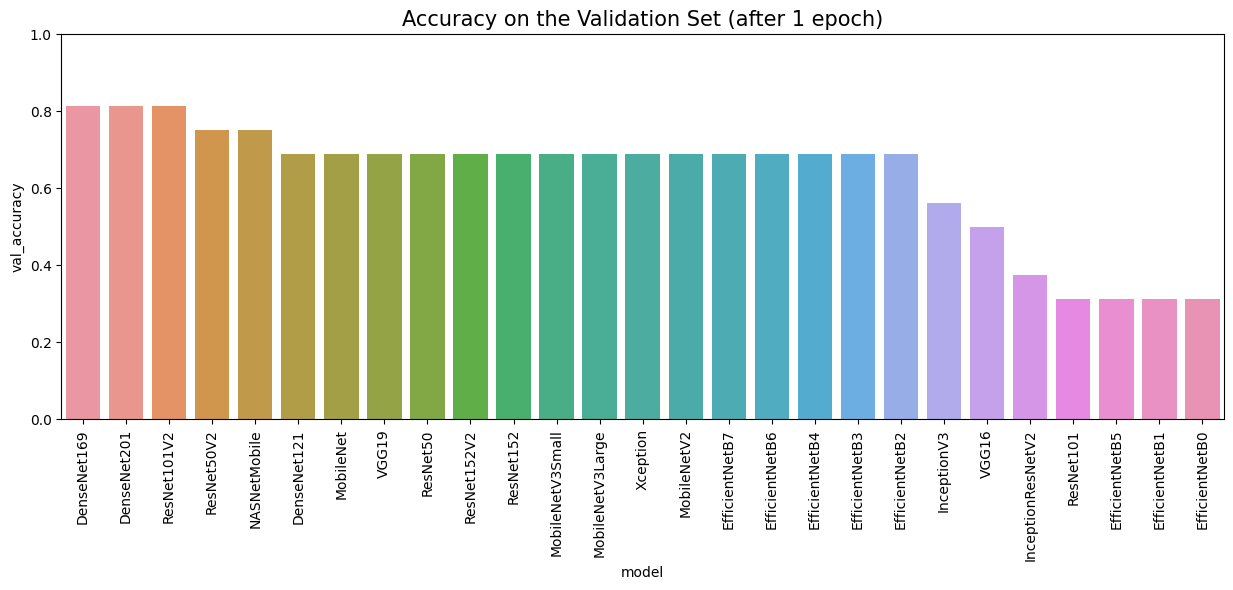

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'val_accuracy', data = df_results)
plt.title('Accuracy on the Validation Set (after 1 epoch)', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

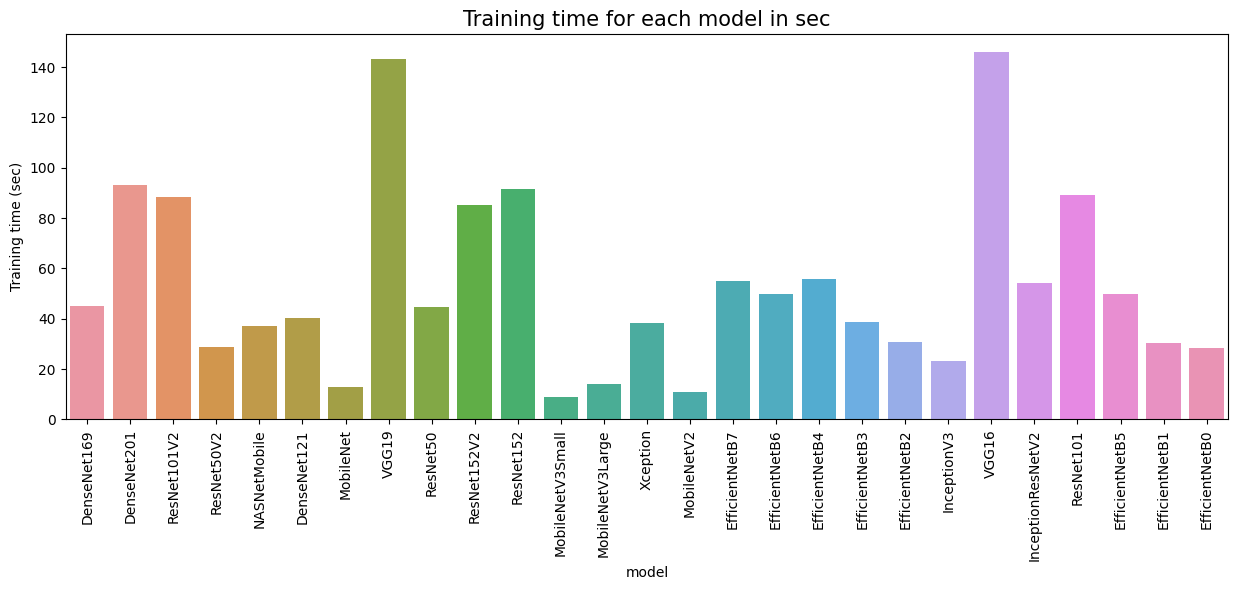

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

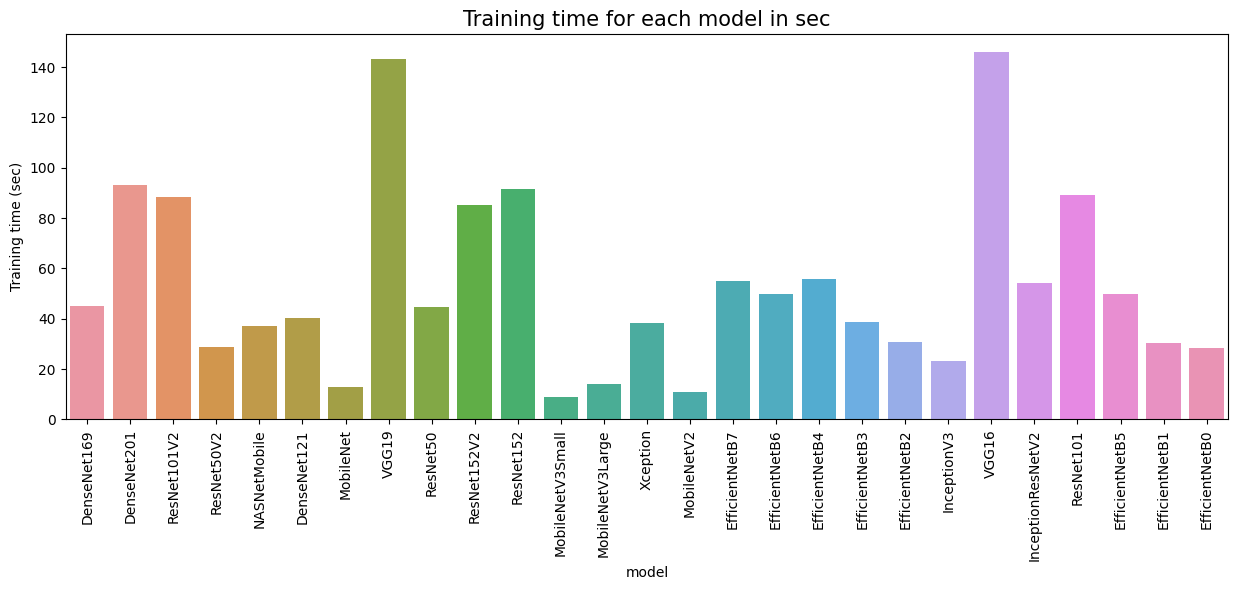

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
5/5 [==============================] - 11s 1s/step - loss: 0.9627 - accuracy: 0.5000 - val_loss: 0.6408 - val_accuracy: 0.6250
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.6500 - accuracy: 0.5833 - val_loss: 0.6425 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 0.5867 - accuracy: 0.6528 - val_loss: 0.6006 - val_accuracy: 0.6875
Epoch 4/10
5/5 [==============================] - 5s 1s/step - loss: 0.5127 - accuracy: 0.7569 - val_loss: 0.5664 - val_accuracy: 0.7500
Epoch 5/10
5/5 [==============================] - 7s 2s/step - loss: 0.4375 - accuracy: 0.7986 - val_loss: 0.5452 - val_accuracy: 0.8125
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.3866 - accuracy: 0.8125 - val_loss: 0.5053 - val_accuracy: 0.8125
Epoch 7/10
5/5 [==============================] - 5s 1s/step - loss: 0.3286 - accuracy: 0.8681 - val_loss: 0.4968 - val_accuracy: 0.6875
Epoch 8/10
5/5 [========================

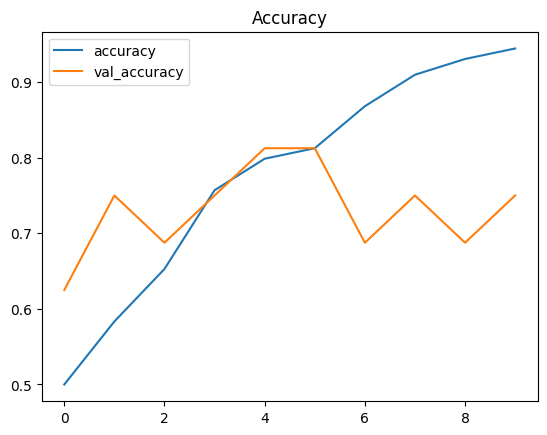

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

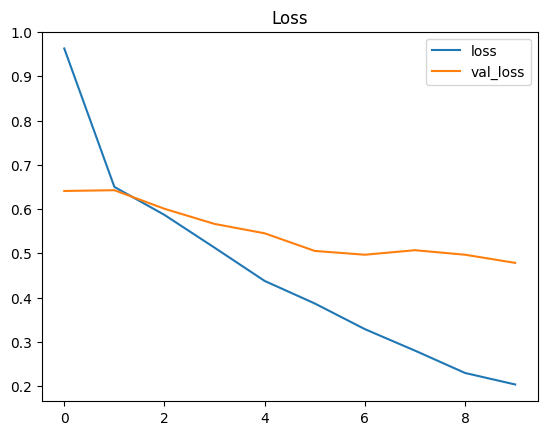

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_images, verbose=0)

In [ ]:
printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))

 ## Test Loss: 0.37617

## Accuracy on the test set: 83.33%

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 2 predictions: {pred[:2]}')

1/1 [==============================] - 1s 1s/step
The first 2 predictions: ['ill', 'normal']


In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ill       1.00      0.67      0.80         9
      normal       0.75      1.00      0.86         9

    accuracy                           0.83        18
   macro avg       0.88      0.83      0.83        18
weighted avg       0.88      0.83      0.83        18



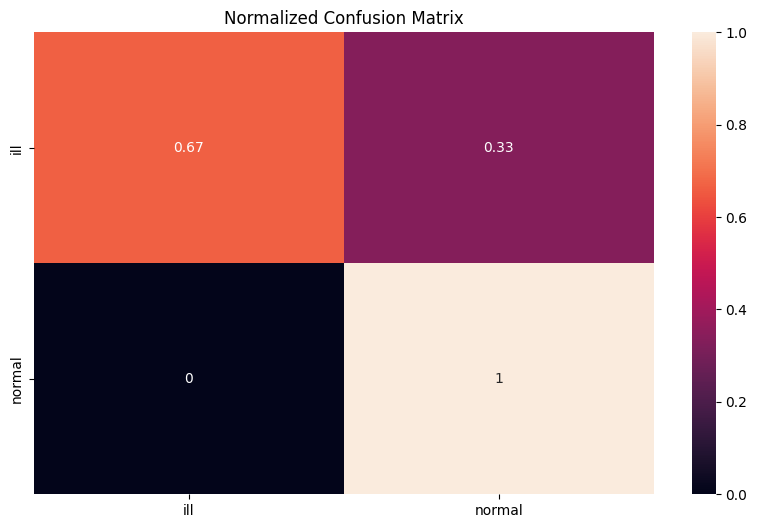

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

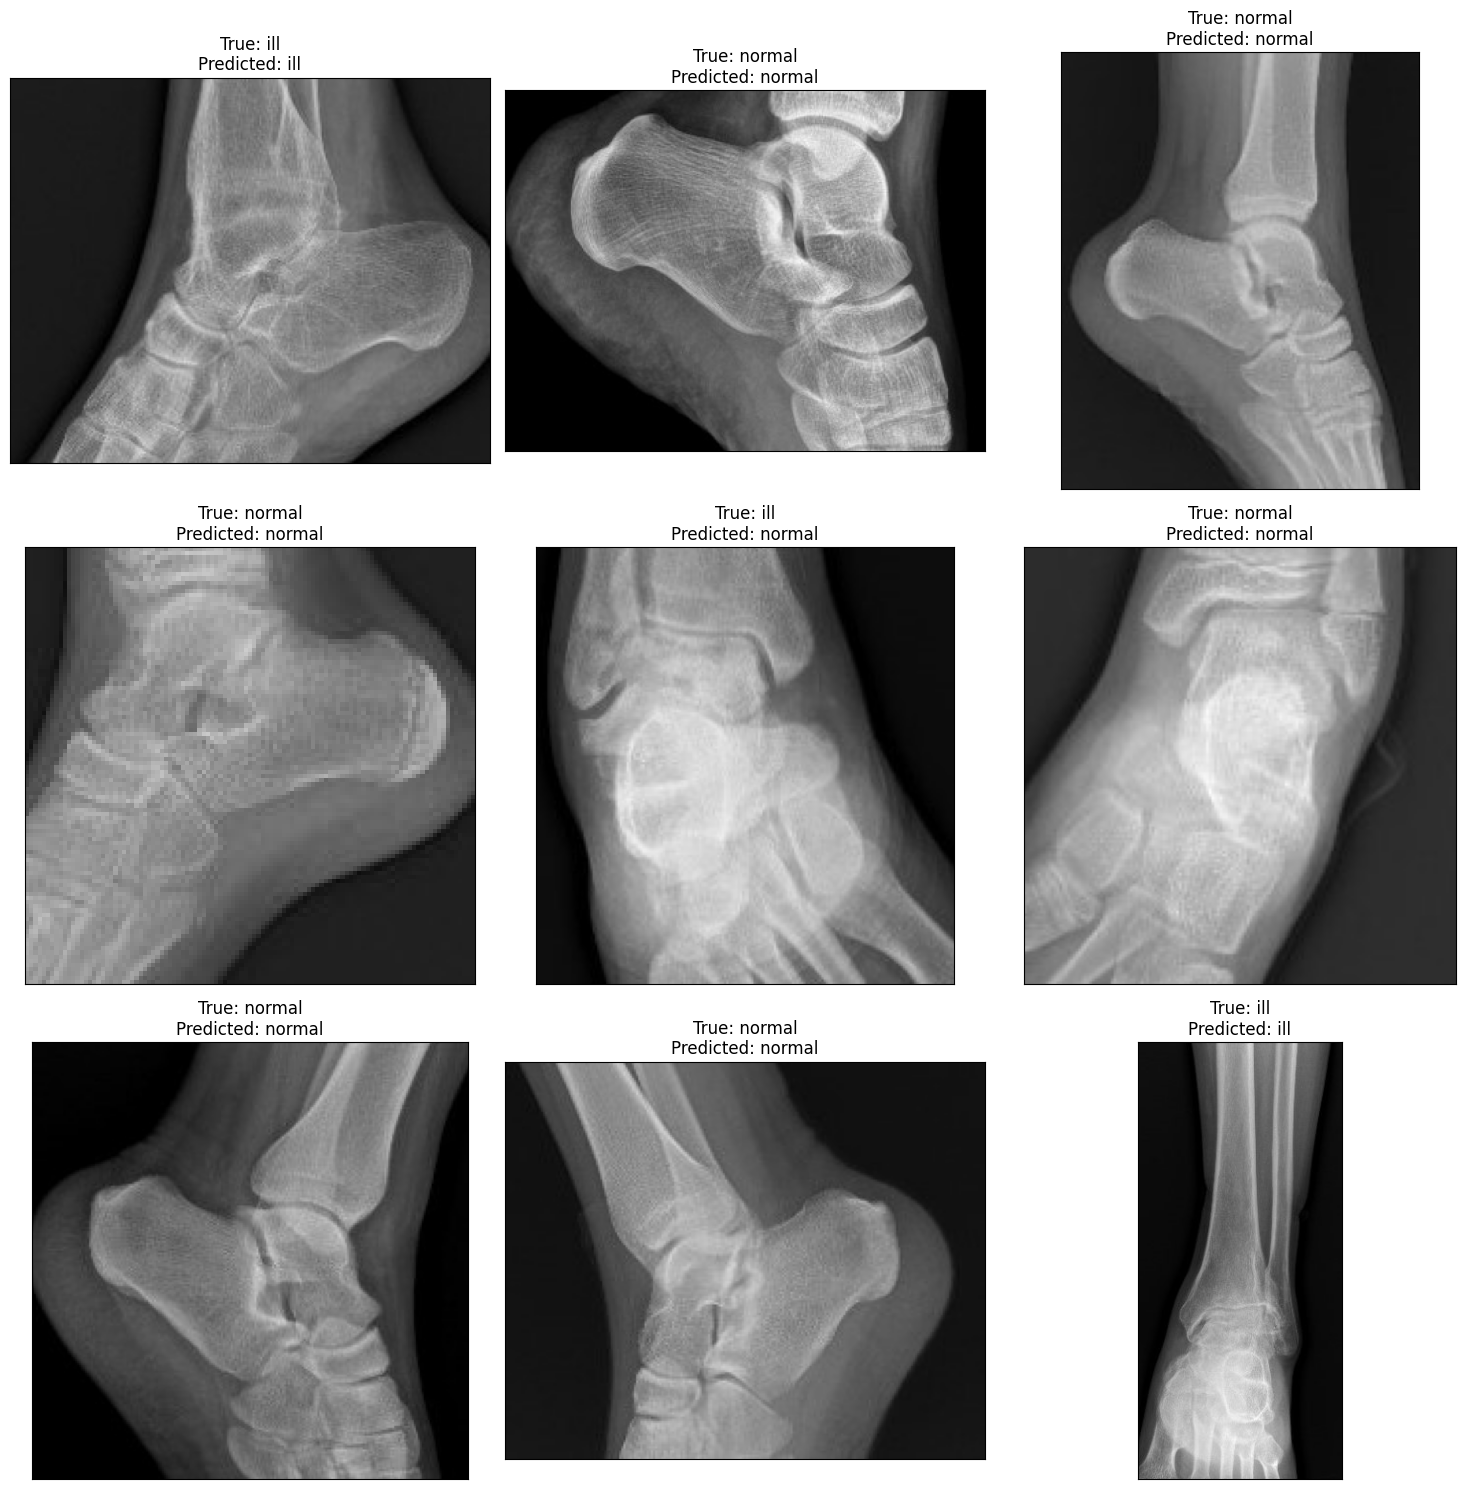

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()